In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

In [2]:
#from google.colab import drive

In [3]:
# get size of the variable in megabytes
def get_variable_size(var):
    display(sys.getsizeof(var)/ (1024**2))

In [4]:
#drive.mount('/content/drive')

In [5]:
#train_data = pd.read_csv('/content/drive/MyDrive/UrfuCsvDatasets/RegressionProject5SecondSemester/train_data_4.csv')
train_data = pd.read_csv('~/Documents/github-repositories/engineering-of-machine-learning-urfu/regression-project-semester-2/train_data_4.csv')

In [6]:
X = train_data.drop(['trip_duration', 'trip_duration_log', 'visibility', 'wind speed', 'precip'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

In [7]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X,
    y_log,
    test_size=0.33,
    random_state=42
)

## 5.

### 5.1.

In [8]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train_log)

LinearRegression()

In [9]:
y_train_predict = model.predict(X_train)
display(y_train_predict)

array([5.9435091 , 6.13063595, 5.88069925, ..., 6.319771  , 5.95769349,
       6.18071586])

In [10]:
y_valid_predict = model.predict(X_valid)
display(y_valid_predict)

array([5.91199795, 5.85517319, 5.57018352, ..., 6.35315793, 6.4821051 ,
       6.04526939])

In [11]:
def calculate_rmsle(y_true, y_pred):
    return round(metrics.mean_squared_error(y_true, y_pred, squared=False), 2)

In [12]:
calculate_rmsle(y_train_log, y_train_predict)

0.53

In [13]:
calculate_rmsle(y_valid_log, y_valid_predict)

0.53

### 5.2.

In [14]:
poly_features = preprocessing.PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly_features.fit_transform(X_train)
X_valid_poly = poly_features.fit_transform(X_valid)

linear_reg_poly = linear_model.LinearRegression()
linear_reg_poly.fit(X_train_poly, y_train_log)

y_train_poly_predict = linear_reg_poly.predict(X_train_poly)
print(f"y_train_poly_predict: {y_train_poly_predict}")
y_valid_poly_predict = linear_reg_poly.predict(X_valid_poly)
print(f"y_valid_poly_predict: {y_valid_poly_predict}")

print("RMSLE train_poly:", calculate_rmsle(y_train_log, y_train_poly_predict))
print("RMSLE train:", calculate_rmsle(y_valid_log, y_valid_poly_predict))

y_train_poly_predict: [5.61651229 6.20226877 6.00143393 ... 5.9524022  5.7179807  6.38090818]
y_valid_poly_predict: [5.82539165 5.34043997 4.75536245 ... 6.15413525 6.74265829 6.06170148]
RMSLE train_poly: 0.46
RMSLE train: 2.21


### 5.3.

In [15]:
ridge = linear_model.Ridge(alpha=1)
ridge.fit(X_train_poly, y_train_log)

y_train_ridge_predict = ridge.predict(X_train_poly)
print(f"y_train_ridge_predict: {y_train_ridge_predict}")
y_valid_ridge_predict = ridge.predict(X_valid_poly)
print(f"y_valid_ridge_predict: {y_valid_ridge_predict}")

print("RMSLE train_ridge:", calculate_rmsle(y_train_log, y_train_ridge_predict))
print("RMSLE valid_ridge:", calculate_rmsle(y_valid_log, y_valid_ridge_predict))

/home/modernpacifist/.local/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.22006e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


y_train_ridge_predict: [5.73412669 6.15909514 6.0028165  ... 5.97225973 5.7959112  6.37342246]
y_valid_ridge_predict: [5.80237715 5.35580186 4.80790507 ... 6.16292605 6.73529053 6.07015043]
RMSLE train_ridge: 0.46
RMSLE valid_ridge: 1.43


### 5.4.

In [16]:
detrreg = tree.DecisionTreeRegressor()
detrreg.fit(X_train, y_train_log)


y_train_detrreg_predict = detrreg.predict(X_train)
print(f"y_train_detrreg_predict: {y_train_detrreg_predict}")
y_valid_detrreg_predict = detrreg.predict(X_valid)
print(f"y_valid_ridge_predict: {y_valid_detrreg_predict}")


print()
print("RMSLE train_detrreg:", calculate_rmsle(y_train_log, y_train_detrreg_predict))
print("RMSLE valid_detrreg:", calculate_rmsle(y_valid_log, y_valid_detrreg_predict))

y_train_detrreg_predict: [6.2441669  6.03308622 5.56068163 ... 5.97635091 5.12989871 6.3851944 ]
y_valid_ridge_predict: [6.0591232  5.50125821 5.92157842 ... 6.27098843 6.56667243 6.80903931]

RMSLE train_detrreg: 0.0
RMSLE valid_detrreg: 0.57


### 5.5.

In [17]:
def rmsle_calculate_lists(max_depths, X_train, y_train_log, X_valid, y_valid_log,  y_train_detrreg_predict, y_valid_detrreg_predict):
    rmsle_train_list = []
    rmsle_valid_list = []

    for max_depth in max_depths:
      detrreg = tree.DecisionTreeRegressor(max_depth=max_depth)
      detrreg.fit(X_train, y_train_log)

      y_train_detrreg_predict = detrreg.predict(X_train)
      y_valid_detrreg_predict = detrreg.predict(X_valid)

      rmsle_detrreg_train = metrics.mean_squared_error(
          y_train_log,
          y_train_detrreg_predict,
          squared=False
      )

      rmsle_detrreg_valid = metrics.mean_squared_error(
          y_valid_log,
          y_valid_detrreg_predict,
          squared=False
      )

      rmsle_train_list.append(rmsle_detrreg_train)
      rmsle_valid_list.append(rmsle_detrreg_valid)

    return rmsle_train_list, rmsle_valid_list

In [18]:
max_depths = range(7, 20)

rmsle_train_list, rmsle_valid_list = rmsle_calculate_lists(
    max_depths,
    X_train, y_train_log, X_valid, y_valid_log,
    y_train_detrreg_predict, y_valid_detrreg_predict
)

In [19]:
print(rmsle_train_list[0:5])
print(rmsle_valid_list[0:5])

[0.44470076134062325, 0.43666234355467043, 0.42918553451678215, 0.42122442990393394, 0.4128554998505746]
[0.44706084918473254, 0.44067071459033114, 0.4352221093514348, 0.4308709435683195, 0.42891787687467386]


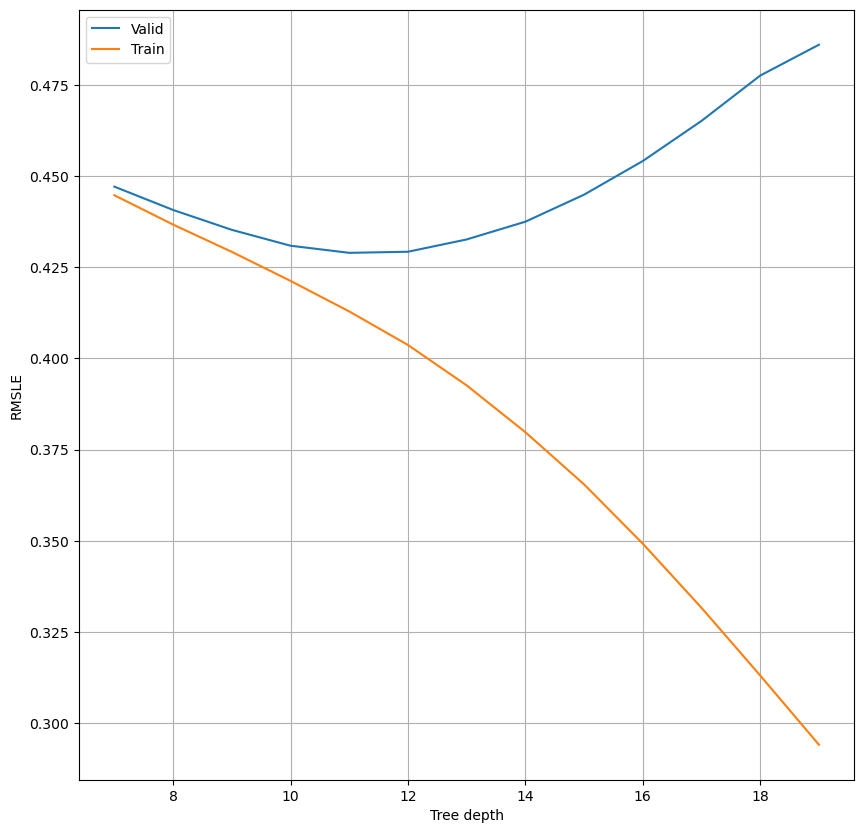

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel("Tree depth")
ax.set_ylabel("RMSLE")
ax.grid()

plt.plot(max_depths, rmsle_valid_list, label="Valid")
plt.plot(max_depths, rmsle_train_list, label="Train")


plt.legend()
plt.show()

In [21]:
detrreg = tree.DecisionTreeRegressor(max_depth=12)
detrreg.fit(X_train, y_train_log)


y_train_detrreg_predict = detrreg.predict(X_train)
y_valid_detrreg_predict = detrreg.predict(X_valid)


print("RMSLE train_detrreg:", calculate_rmsle(y_train_log, y_train_detrreg_predict))
print("RMSLE valid_detrreg:", calculate_rmsle(y_valid_log, y_valid_detrreg_predict))

RMSLE train_detrreg: 0.4
RMSLE valid_detrreg: 0.43


## 6.

### 6.1.

In [22]:
RF_reg = ensemble.RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    criterion='squared_error',
    min_samples_split=20,
    random_state=42,
    verbose=True,
    n_jobs=-1,
)
RF_reg.fit(X_train, y_train_log)

y_train_RF_reg_predict = RF_reg.predict(X_train)
y_valid_RF_reg_predict = RF_reg.predict(X_valid)

print("RMSLE train_detrreg:", calculate_rmsle(y_train_log, y_train_RF_reg_predict))
print("RMSLE valid_detrreg:", calculate_rmsle(y_valid_log, y_valid_RF_reg_predict))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.9min finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    0.6s
[Parallel(n_jobs=24)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s


RMSLE train_detrreg: 0.4
RMSLE valid_detrreg: 0.41


[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:    0.3s
[Parallel(n_jobs=24)]: Done 200 out of 200 | elapsed:    0.4s finished


### 6.2.

In [ ]:
gradbost = ensemble.GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    min_samples_split=30,
    random_state=42,
    verbose=True,
)
gradbost.fit(X_train, y_train_log)


y_train_gradbost_predict = gradbost.predict(X_train)
y_valid_gradbost_predict = gradbost.predict(X_valid)


print("RMSLE train_gradbost:", calculate_rmsle(y_train_log, y_train_gradbost_predict))
print("RMSLE valid_gradbost:", calculate_rmsle(y_valid_log, y_valid_gradbost_predict))

      Iter       Train Loss   Remaining Time 
         1           0.3110            8.03m
         2           0.2245            7.98m
         3           0.1980            7.90m
         4           0.1865            7.81m
         5           0.1804            7.73m
         6           0.1763            7.65m
         7           0.1732            7.58m
         8           0.1697            7.48m
         9           0.1672            7.39m
        10           0.1661            7.32m
        20           0.1562            6.50m
        30           0.1508            5.68m
        40           0.1472            4.86m
        50           0.1443            4.05m
        60           0.1424            3.24m
        70           0.1403            2.43m


### 6.4.

In [ ]:
plt.figure(figsize=(10, 8))

plt.ylabel("feature_names_in_")
plt.xlabel("feature_importances_")

plt.barh(
    gradbost.feature_names_in_,
    gradbost.feature_importances_
)
plt.show()

### 6.5.

In [ ]:
y_true = np.exp(y_train_log) - 1
y_pred = np.exp(y_train_gradbost_predict) - 1

MeAE = round(metrics.median_absolute_error(y_true, y_pred) / 60, 1)
display(MeAE)